In [1]:
import pandas as pd

In [2]:
# Import Presidential Race Results
# Data Source: Wikipedia
# URL for 2016 Results: https://en.wikipedia.org/wiki/2016_United_States_presidential_election#Results_by_state
# URL for 2020 Results: https://en.wikipedia.org/wiki/2020_United_States_presidential_election#Results_by_state
# both as of 11/25/2020
state_pw_file = 'State_PresidentialWinner.csv'
state_pw_df = pd.read_csv(state_pw_file)
state_pw_df

State     2016   2020
0                Alabama    Trump  Trump
1                 Alaska    Trump  Trump
2                Arizona    Trump  Biden
3               Arkansas    Trump  Trump
4             California  Clinton  Biden
5               Colorado  Clinton  Biden
6            Connecticut  Clinton  Biden
7               Delaware  Clinton  Biden
8   District of Columbia  Clinton  Biden
9                Florida    Trump  Trump
10               Georgia    Trump  Biden
11                Hawaii  Clinton  Biden
12                 Idaho    Trump  Trump
13              Illinois  Clinton  Biden
14               Indiana    Trump  Trump
15                  Iowa    Trump  Trump
16                Kansas    Trump  Trump
17              Kentucky    Trump  Trump
18             Louisiana    Trump  Trump
19                 Maine  Clinton  Biden
20              Maryland  Clinton  Biden
21         Massachusetts  Clinton  Biden
22              Michigan    Trump  Biden
23             Minnesota  Clinton  Biden
24           Mississippi    Trump  Trump
25              Missouri    Trump  Trump
26               Montana    Trump  Trump
27              Nebraska    Trump  Trump
28                Nevada  Clinton  Biden
29         New Hampshire  Clinton  Biden
30            New Jersey  Clinton  Biden
31            New Mexico  Clinton  Biden
32              New York  Clinton  Biden
33        North Carolina    Trump  Trump
34          North Dakota    Trump  Trump
35                  Ohio    Trump  Trump
36              Oklahoma    Trump  Trump
37                Oregon  Clinton  Biden
38          Pennsylvania    Trump  Biden
39          Rhode Island  Clinton  Biden
40        South Carolina    Trump  Trump
41          South Dakota    Trump  Trump
42             Tennessee    Trump  Trump
43                 Texas    Trump  Trump
44                  Utah    Trump  Trump
45               Vermont  Clinton  Biden
46              Virginia  Clinton  Biden
47            Washington  Clinton  Biden
48         West Virginia    Trump  Trump
49             Wisconsin    Trump  Biden
50               Wyoming    Trump  Trump

In [3]:
# Import Population Data
# Data source: US Census Bureau
# URL Source: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
# Dataset: http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv
population_filename = 'nst-est2019-alldata.csv'
population_df = pd.read_csv(population_filename)
population_df

SUMLEV REGION DIVISION  STATE                  NAME  CENSUS2010POP  \
0       10      0        0      0         United States      308745538   
1       20      1        0      0      Northeast Region       55317240   
2       20      2        0      0        Midwest Region       66927001   
3       20      3        0      0          South Region      114555744   
4       20      4        0      0           West Region       71945553   
5       40      3        6      1               Alabama        4779736   
6       40      4        9      2                Alaska         710231   
7       40      4        8      4               Arizona        6392017   
8       40      3        7      5              Arkansas        2915918   
9       40      4        9      6            California       37253956   
10      40      4        8      8              Colorado        5029196   
11      40      1        1      9           Connecticut        3574097   
12      40      3        5     10              Delaware         897934   
13      40      3        5     11  District of Columbia         601723   
14      40      3        5     12               Florida       18801310   
15      40      3        5     13               Georgia        9687653   
16      40      4        9     15                Hawaii        1360301   
17      40      4        8     16                 Idaho        1567582   
18      40      2        3     17              Illinois       12830632   
19      40      2        3     18               Indiana        6483802   
20      40      2        4     19                  Iowa        3046355   
21      40      2        4     20                Kansas        2853118   
22      40      3        6     21              Kentucky        4339367   
23      40      3        7     22             Louisiana        4533372   
24      40      1        1     23                 Maine        1328361   
25      40      3        5     24              Maryland        5773552   
26      40      1        1     25         Massachusetts        6547629   
27      40      2        3     26              Michigan        9883640   
28      40      2        4     27             Minnesota        5303925   
29      40      3        6     28           Mississippi        2967297   
30      40      2        4     29              Missouri        5988927   
31      40      4        8     30               Montana         989415   
32      40      2        4     31              Nebraska        1826341   
33      40      4        8     32                Nevada        2700551   
34      40      1        1     33         New Hampshire        1316470   
35      40      1        2     34            New Jersey        8791894   
36      40      4        8     35            New Mexico        2059179   
37      40      1        2     36              New York       19378102   
38      40      3        5     37        North Carolina        9535483   
39      40      2        4     38          North Dakota         672591   
40      40      2        3     39                  Ohio       11536504   
41      40      3        7     40              Oklahoma        3751351   
42      40      4        9     41                Oregon        3831074   
43      40      1        2     42          Pennsylvania       12702379   
44      40      1        1     44          Rhode Island        1052567   
45      40      3        5     45        South Carolina        4625364   
46      40      2        4     46          South Dakota         814180   
47      40      3        6     47             Tennessee        6346105   
48      40      3        7     48                 Texas       25145561   
49      40      4        8     49                  Utah        2763885   
50      40      1        1     50               Vermont         625741   
51      40      3        5     51              Virginia        8001024   
52      40      4        9     53            Washington        6724540   
53      

In [4]:
# merge population data with presidential winner data
popcol = 'POPESTIMATE2019'
state_df = state_pw_df.merge(population_df[['NAME', popcol]], how = 'left', left_on = 'State', right_on = 'NAME')
state_df = state_df.drop(columns = 'NAME')
state_df['Category'] = state_df.apply(lambda x: f"{x['2016']} - {x['2020']}", axis = 1)
state_df = state_df.rename(columns = {popcol: 'Population'})

print(state_df['Category'].unique().tolist())
state_df

['Trump - Trump', 'Trump - Biden', 'Clinton - Biden']


State     2016   2020  Population         Category
0                Alabama    Trump  Trump     4903185    Trump - Trump
1                 Alaska    Trump  Trump      731545    Trump - Trump
2                Arizona    Trump  Biden     7278717    Trump - Biden
3               Arkansas    Trump  Trump     3017804    Trump - Trump
4             California  Clinton  Biden    39512223  Clinton - Biden
5               Colorado  Clinton  Biden     5758736  Clinton - Biden
6            Connecticut  Clinton  Biden     3565287  Clinton - Biden
7               Delaware  Clinton  Biden      973764  Clinton - Biden
8   District of Columbia  Clinton  Biden      705749  Clinton - Biden
9                Florida    Trump  Trump    21477737    Trump - Trump
10               Georgia    Trump  Biden    10617423    Trump - Biden
11                Hawaii  Clinton  Biden     1415872  Clinton - Biden
12                 Idaho    Trump  Trump     1787065    Trump - Trump
13              Illinois  Clinton  Biden    12671821  Clinton - Biden
14               Indiana    Trump  Trump     6732219    Trump - Trump
15                  Iowa    Trump  Trump     3155070    Trump - Trump
16                Kansas    Trump  Trump     2913314    Trump - Trump
17              Kentucky    Trump  Trump     4467673    Trump - Trump
18             Louisiana    Trump  Trump     4648794    Trump - Trump
19                 Maine  Clinton  Biden     1344212  Clinton - Biden
20              Maryland  Clinton  Biden     6045680  Clinton - Biden
21         Massachusetts  Clinton  Biden     6892503  Clinton - Biden
22              Michigan    Trump  Biden     9986857    Trump - Biden
23             Minnesota  Clinton  Biden     5639632  Clinton - Biden
24           Mississippi    Trump  Trump     2976149    Trump - Trump
25              Missouri    Trump  Trump     6137428    Trump - Trump
26               Montana    Trump  Trump     1068778    Trump - Trump
27              Nebraska    Trump  Trump     1934408    Trump - Trump
28                Nevada  Clinton  Biden     3080156  Clinton - Biden
29         New Hampshire  Clinton  Biden     1359711  Clinton - Biden
30            New Jersey  Clinton  Biden     8882190  Clinton - Biden
31            New Mexico  Clinton  Biden     2096829  Clinton - Biden
32              New York  Clinton  Biden    19453561  Clinton - Biden
33        North Carolina    Trump  Trump    10488084    Trump - Trump
34          North Dakota    Trump  Trump      762062    Trump - Trump
35                  Ohio    Trump  Trump    11689100    Trump - Trump
36              Oklahoma    Trump  Trump     3956971    Trump - Trump
37                Oregon  Clinton  Biden     4217737  Clinton - Biden
38          Pennsylvania    Trump  Biden    12801989    Trump - Biden
39          Rhode Island  Clinton  Biden     1059361  Clinton - Biden
40        South Carolina    Trump  Trump     5148714    Trump - Trump
41          South Dakota    Trump  Trump      884659    Trump - Trump
42             Tennessee    Trump  Trump     6829174    Trump - Trump
43                 Texas    Trump  Trump    28995881    Trump - Trump
44                  Utah    Trump  Trump     3205958    Trump - Trump
45               Vermont  Clinton  Biden      623989  Clinton - Biden
46              Virginia  Clinton  Biden     8535519  Clinton - Biden
47            Washington  Clinton  Biden     7614893  Clinton - Biden
48         West Virginia    Trump  Trump     1792147    Trump - Trump
49             Wisconsin    Trump  Biden     5822434    Trump - Biden
50               Wyoming    Trump  Trump      578759    Trump - Trump

In [5]:
# Get COVID-19 Data
# Data Source: New York Times
# Github URL: https://github.com/nytimes/covid-19-data
covid_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
covid_df = pd.read_csv(covid_url)
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Start it from April
covid_df = covid_df[covid_df['date'] >= '04-01-2020']
covid_df

date          state  fips   cases  deaths
1609  2020-04-01        Alabama     1    1108      28
1610  2020-04-01         Alaska     2     143       2
1611  2020-04-01        Arizona     4    1413      29
1612  2020-04-01       Arkansas     5     624      10
1613  2020-04-01     California     6    9857     212
...          ...            ...   ...     ...     ...
14694 2020-11-24       Virginia    51  223582    3979
14695 2020-11-24     Washington    53  158234    2807
14696 2020-11-24  West Virginia    54   42083     682
14697 2020-11-24      Wisconsin    55  386441    3295
14698 2020-11-24        Wyoming    56   29959     202

[13090 rows x 5 columns]

In [6]:
# merge with population and presidential winner data
merge_df = covid_df.merge(state_df[['State', 'Population', 'Category']], how = 'right', left_on = 'state', right_on = 'State')

# scale cases and deaths by state's population
merge_df['Cases per 100k pop'] = merge_df.apply(lambda x: x['cases'] * 1e5 / x['Population'], axis = 1)
merge_df['Deaths per 100k pop'] = merge_df.apply(lambda x: x['deaths'] * 1e5 / x['Population'], axis = 1)
merge_df

date    state  fips  cases  deaths    State  Population  \
0     2020-04-01  Alabama     1   1108      28  Alabama     4903185   
1     2020-04-02  Alabama     1   1270      32  Alabama     4903185   
2     2020-04-03  Alabama     1   1535      38  Alabama     4903185   
3     2020-04-04  Alabama     1   1632      44  Alabama     4903185   
4     2020-04-05  Alabama     1   1840      45  Alabama     4903185   
...          ...      ...   ...    ...     ...      ...         ...   
12133 2020-11-20  Wyoming    56  27129     176  Wyoming      578759   
12134 2020-11-21  Wyoming    56  27410     176  Wyoming      578759   
12135 2020-11-22  Wyoming    56  28169     176  Wyoming      578759   
12136 2020-11-23  Wyoming    56  29431     202  Wyoming      578759   
12137 2020-11-24  Wyoming    56  29959     202  Wyoming      578759   

            Category  Cases per 100k pop  Deaths per 100k pop  
0      Trump - Trump           22.597556             0.571057  
1      Trump - Trump           25.901531             0.652637  
2      Trump - Trump           31.306182             0.775006  
3      Trump - Trump           33.284488             0.897376  
4      Trump - Trump           37.526628             0.917771  
...              ...                 ...                  ...  
12133  Trump - Trump         4687.443305            30.409894  
12134  Trump - Trump         4735.995466            30.409894  
12135  Trump - Trump         4867.138135            30.409894  
12136  Trump - Trump         5085.190900            34.902265  
12137  Trump - Trump         5176.420583            34.902265  

[12138 rows x 10 columns]

Text(0.5, 1.0, 'COVID-19 Cases in the US by how state voted in 2016 - 2020 Presidential Elections')

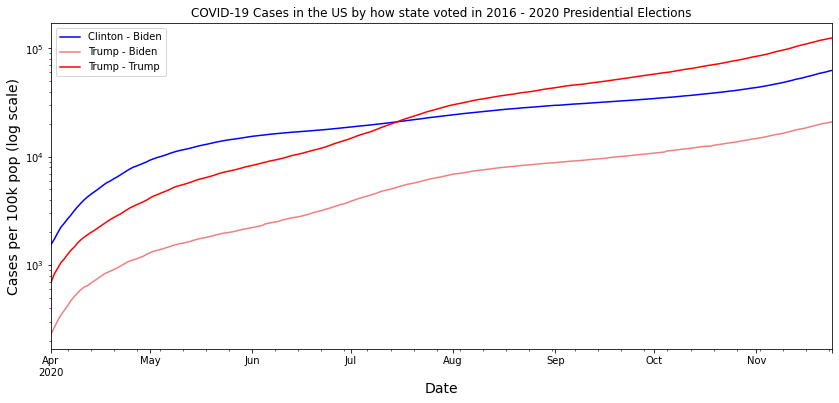

In [7]:
# Graph for cases
graphcol = 'Cases per 100k pop'
ax = merge_df.loc[merge_df['Category'] == 'Clinton - Biden'].groupby('date').sum()[graphcol].plot(
            color = 'blue', label = 'Clinton - Biden', figsize = (14, 6))
merge_df.loc[merge_df['Category'] == 'Trump - Biden'].groupby('date').sum()[graphcol].plot(
            color = 'lightcoral', label = 'Trump - Biden', ax = ax)
merge_df.loc[merge_df['Category'] == 'Trump - Trump'].groupby('date').sum()[graphcol].plot(
            color = 'red', label = 'Trump - Trump', ax = ax)
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel(f'{graphcol} (log scale)', fontsize = 14)
ax.set_title('COVID-19 Cases in the US by how state voted in 2016 - 2020 Presidential Elections')

Text(0.5, 1.0, 'COVID-19 Deaths in the US by how state voted in 2016 - 2020 Presidential Elections')

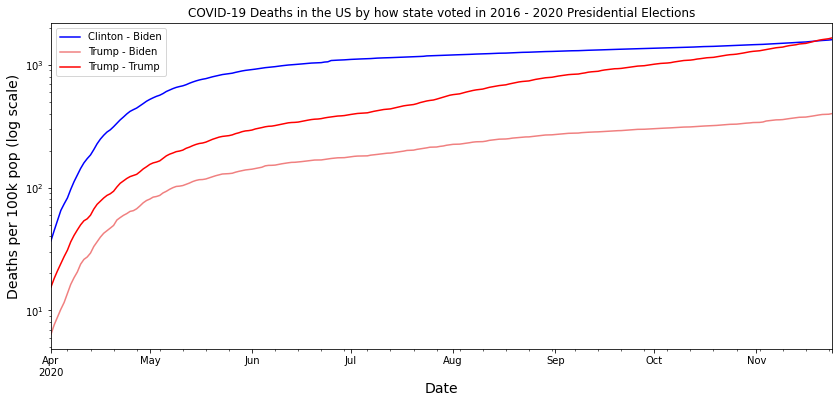

In [8]:
# Graph for deaths
graphcol = 'Deaths per 100k pop'
ax = merge_df.loc[merge_df['Category'] == 'Clinton - Biden'].groupby('date').sum()[graphcol].plot(
            color = 'blue', label = 'Clinton - Biden', figsize = (14, 6))
merge_df.loc[merge_df['Category'] == 'Trump - Biden'].groupby('date').sum()[graphcol].plot(
            color = 'lightcoral', label = 'Trump - Biden', ax = ax)
merge_df.loc[merge_df['Category'] == 'Trump - Trump'].groupby('date').sum()[graphcol].plot(
            color = 'red', label = 'Trump - Trump', ax = ax)
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel(f'{graphcol} (log scale)', fontsize = 14)
ax.set_title('COVID-19 Deaths in the US by how state voted in 2016 - 2020 Presidential Elections')